In [1]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
from matplotlib import  font_manager, rc

In [2]:
df = pd.read_csv("Traffic_Accident_2017.csv", encoding = "EUC-KR", index_col="발생년")
df.head(5)

,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,...,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_1당,당사자종별_2당_대분류,당사자종별_2당,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
발생년,,,,,,,,,,,,,,,,,,,,,
2017,2017010101,15,야간,일,1,2,1,0,0,전남,...,단일로,기타단일로,승용차,승용차,승용차,승용차,933501,1700129,126.768634,35.294464
2017,2017010102,28,야간,일,1,1,0,0,0,서울,...,교차로,교차로부근,승용차,승용차,보행자,보행자,967570,1944453,127.133107,37.498741
2017,2017010102,43,야간,일,1,2,0,1,0,충남,...,단일로,기타단일로,승용차,승용차,승용차,승용차,916497,1842880,126.566631,36.580069
2017,2017010102,22,야간,일,1,1,0,0,0,충남,...,단일로,기타단일로,승용차,승용차,없음,없음,961608,1864573,127.069759,36.778505
2017,2017010104,37,야간,일,1,1,0,0,0,서울,...,단일로,기타단일로,승용차,승용차,보행자,보행자,946778,1941695,126.898094,37.472946


In [45]:
time = df.발생년월일시
time = time%100
time

발생년
2017     1
2017     2
2017     2
2017     2
2017     4
        ..
2017    18
2017    18
2017    19
2017    20
2017    23
Name: 발생년월일시, Length: 4065, dtype: int64

카테고리 만들기

In [49]:
time = time # 내가 구분하고 싶은 데이터
bins = [-1,2,5,8,11,14,17,20,23] #간격설정 : 구간 시작점은 1 작게 설정
labels = ["0~2", "3~5", '6~8', '9~11', '12~14', "15~17", "18~20", "21~23"]
accident_view = pd.cut(time, bins, labels=labels)
accident_view

발생년
2017      0~2
2017      0~2
2017      0~2
2017      0~2
2017      3~5
        ...  
2017    18~20
2017    18~20
2017    18~20
2017    18~20
2017    21~23
Name: 발생년월일시, Length: 4065, dtype: category
Categories (8, object): ['0~2' < '3~5' < '6~8' < '9~11' < '12~14' < '15~17' < '18~20' < '21~23']

In [72]:
times_sum = accident_view.value_counts().sort_index()
times_sum

0~2      421
3~5      444
6~8      466
9~11     526
12~14    472
15~17    550
18~20    692
21~23    494
Name: 발생년월일시, dtype: int64

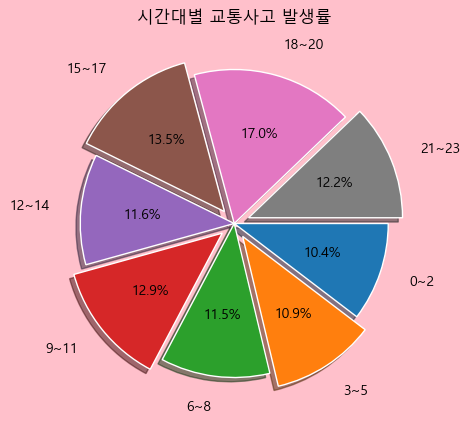

In [124]:
font_name = font_manager.FontProperties(fname = "C:/Windows/Fonts/malgun.ttf").get_name()
rc("font", family = font_name)

explode = [0, 0.10, 0, 0.10, 0, 0.10, 0, 0.10]
# colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']

plt.figure(figsize = (5,5)).patch.set_facecolor("pink")
plt.pie(times_sum  #넣고 싶은 데이터
                #레이블 설정
				, labels=labels #각 그래프에 파이부분
                , labeldistance=1.2  #레이블이 그래프레어 얼마나 멀리 위치하냐(기본은 1.1정도)
				, counterclock=False #counterclock = False는 반시계방향
                #그래프 안에 내용 설정
				, autopct="%1.1f%%"  #소수점 1번째까지 실수로 표현해줘
                # , colors=colors #그래프안 색 변경
                #그래프 설정
                , explode=explode #중심에서 벗어나기
                , wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }
                , shadow = True #음영넣기
                ) 

plt.title("시간대별 교통사고 발생률")

plt.rcParams["figure.figsize"] = (10,10)

plt.show()

GDP실습

In [125]:
years = [1950,1960,1970,1980,1990,2000,2010]
gdp = [67.0,80.0,257.0,1686.0,6505,11865.3,22105.3]



C:\Users\user\AppData\Local\Temp\ipykernel_8320\1702811931.py:50: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  plt.savefig("gdp_per_captita.png", dpi = 600)
C:\Users\user\AppData\Local\Temp\ipykernel_8320\1702811931.py:50: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  plt.savefig("gdp_per_captita.png", dpi = 600)


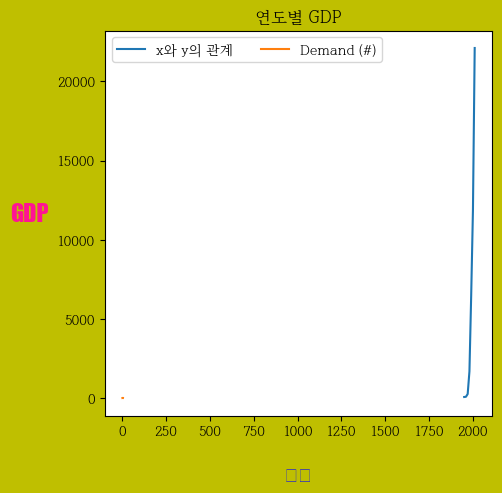

In [211]:
font_name = font_manager.FontProperties(fname = "C:/Windows/Fonts/HANBatang.ttf").get_name()
rc("font", family = font_name)

font1 = {'family': 'fantasy',
         'color': 'b',
         'weight': 'bold',
         'size': 14
         }

font2 = {'family': 'fantasy',
         'color': 'deeppink',
         'weight': 'normal',
         'size': 'xx-large'
         }

#그래프 내부 크키
plt.figure(figsize = (5,5)).patch.set_facecolor("y")

plt.plot(
        #넣고 싶은 데이터
            years, gdp
        #범례 lable 문자열 설정
            , label = "x와 y의 관계"
        )
plt.plot([1, 2, 3, 4], [3, 5, 9, 7], label='Demand (#)')

#범례 표시 함수 호출
# plt.legend()
# plt.legend(loc=(0.0, 0.0))
# plt.legend(loc=(0.5, 0.5))
# plt.legend(loc=(1.0, 1.0))
plt.legend(loc='best', ncol=3)

#축 레이블(이름) 설정하기 : plt.x(y)label("이름")
plt.xlabel("연도"       #x축 이름
           , labelpad=20    #그래프에서 레이블이 떨어지는 정도 
           , fontdict=font1     #레이블 폰트 설정하기
           , loc='center'       #레이블 위치 설정하기 => {‘left’, ‘center’, ‘right’} 中 택1
           )   
plt.ylabel("GDP"     #y축 이름
           , labelpad=20    #그래프에서 레이블이 떨어지는 정도
           , fontdict=font2     #레이블 폰트 설정하기
           , loc = "center"       #레이블 위치 설정하기 => {‘bottom’, ‘center’, ‘top’}
           ).set_rotation(360)       

#그래프 이름 설정하기
plt.title("연도별 GDP")

#저장할 때 이름 설정
plt.savefig("gdp_per_captita.png", dpi = 600)

plt.show()

AttributeError: 'Line2D' object has no property 'labels'

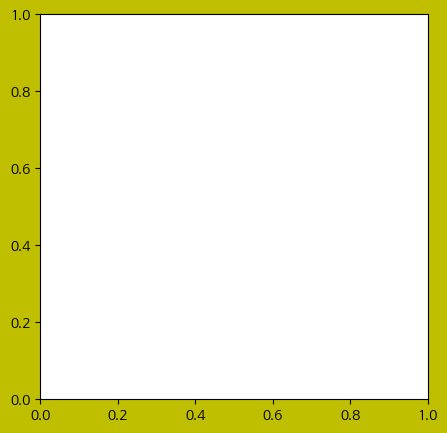

In [157]:
font_name = font_manager.FontProperties(fname = "C:/Windows/Fonts/Hancom Gothic Bold.ttf").get_name()
rc("font", family = font_name)

x = [x for x in range(20)]
y = [y*2 for y in x]
z = [p*3 for p in x]

#그래프 내부 크키
plt.figure(figsize = (5,5)).patch.set_facecolor("y")

# plt.plot(
#         #넣고 싶은 데이터
#             x, y
#         #marker(점)의 설정 변경
#             ,marker = "o" #점의 모양
#         )
# plt.plot(x,z, labels = "x와z")
plt.plot(x,z, labels = "x와y")
plt.plot(y,z, labels = "y와z")

# plt.plot(a, b)


#축 레이블(이름) 설정하기 : plt.x(y)label("이름")
plt.xlabel("X축") #x축 이름
plt.ylabel("Z축").set_rotation(360) #y축 이름 

#그래프 title(제목) 설정
plt.title("그래프 그리기 연습")

#저장할 때 이름 설정
plt.savefig("그래프 그리기 연습.png", dpi = 600)

plt.show()

In [232]:
sr = pd.Series([90,90,55,78,67,26,24,97], name="영어점수")
sr.index = ["철수", "영희", "민영", "민수", "은희", "동현", "윤정", "민정"]
sr

철수    90
영희    90
민영    55
민수    78
은희    67
동현    26
윤정    24
민정    97
Name: 영어점수, dtype: int64

<u>시리즈.nlargest(n, keep='first')</u>
  
n : 상위 몇개까지 나타낼 것인가
keep='first' : 동등한 값이 있다면 제일 먼저 나온 값을 보여준다.  
  
시리즈의 경우엔 컬럼을 명시할 필요 없다.  
  
데이터프레임.nlargest(n, columns, keep='first')  
  
데이터프레임의 경우 우선 순위에 따라 컬럼을 명시해 줄 수 있다.

In [233]:
#높은 점수 순으로 원하는 개수만큼 가져오기
sr.nlargest(2, keep = "all")
sr.nlargest(2, keep = "first")

민정    97
철수    90
Name: 영어점수, dtype: int64

In [234]:
#80점 이상
sr[sr >= 80]

철수    90
영희    90
민정    97
Name: 영어점수, dtype: int64

In [235]:
#50점 이상 60점 이하
sr[(sr >= 50) & (sr <= 60)]

민영    55
Name: 영어점수, dtype: int64

In [236]:
#영어 점수의 평균
sr.mean()

65.875

<AxesSubplot:>

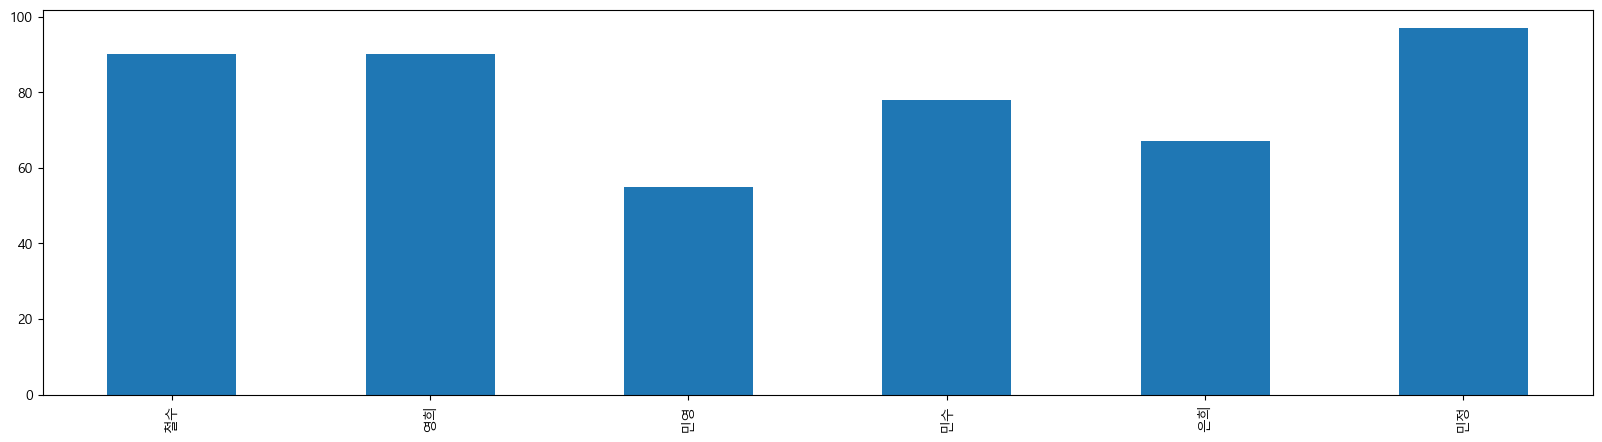

In [237]:
#50점이상인 데이터로 바차트
up_50 = sr[(sr >= 50)]

font_name = font_manager.FontProperties(fname = "C:/Windows/Fonts/malgun.ttf").get_name()
rc("font", family = font_name)

up_50.plot(kind = "bar")
# plt.xlabel().set_rotation(360)

In [ ]:
#이름을 입력받아 점수 출력하기

In [246]:
a = input("이름을 입력하세요. >> ")

if a not in sr.index:
    print("학생이 없습니다. 확인 후 다시 입력하세요")
else:
    for name in sr.index:
        if a == name:
            print(f"{a}의 영어점수는",sr[f"{name}"], "입니다")
        else:
            pass


학생이 없습니다. 확인 후 다시 입력하세요


#영어점수 등급 매기기  
#A:90-100 / B:80-89 / C:70-79 / D:60:-69 / F : 0-59  
![KakaoTalk_20220923_111142463](https://user-images.githubusercontent.com/87592790/191880643-0929e5a0-a496-44e8-8079-80d4b279d0ae.png)

In [274]:
bins = [-1, 59,69,79,89,100] #간격설정 : 구간 시작점은 1 작게 설정
labels = ["F", "D", 'C', 'B', 'A']
grade = pd.cut(sr, bins, labels=labels)
score = pd.DataFrame(sr)
score["학점"] = grade
score

,영어점수,학점
철수,90,A
영희,90,A
민영,55,F
민수,78,C
은희,67,D
동현,26,F
윤정,24,F
민정,97,A


In [291]:
print("-"*20)
print("이름", "영어", "등급", sep = "\t")
print("-"*20)
for name in sr.index:
    print(f"{name}\t {sr[f'{name}']}\t {grade[f'{name}']}")
    
# pd.merge(sr, grade)


--------------------
이름	영어	등급
--------------------
철수	 90	 A
영희	 90	 A
민영	 55	 F
민수	 78	 C
은희	 67	 D
동현	 26	 F
윤정	 24	 F
민정	 97	 A


In [279]:
sr.quantile([0.1, 0.5, 0.9])
#하위 10%, 하위 50, 하위90%(상위10%)

0.1    25.4
0.5    72.5
0.9    92.1
Name: 영어점수, dtype: float64

#과일 데이터로 파이차트 만들기

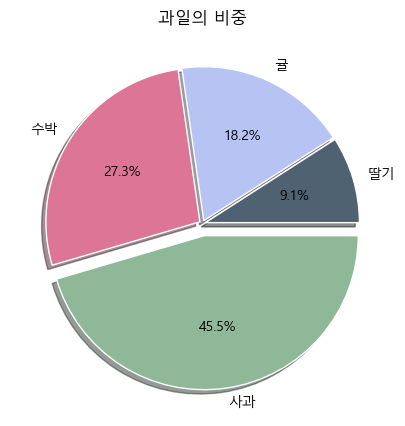

In [317]:
fruit = pd.Series([10,20,30,50]
                  , index=["딸기", "귤", "수박", "사과"]
                  , name = "과일"
                  )
fruit
#================================ 파이 차트 그리기 ========================================
font_name = font_manager.FontProperties(fname = "C:/Windows/Fonts/malgun.ttf").get_name()
rc("font", family = font_name)

colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']

plt.figure(figsize = (5, 5)).patch.set_facecolor("w")
plt.pie(
        #넣고 싶은 데이터
            fruit #데이터프레임  
            
        #레이블 설정
            , labels=["딸기", "귤", "수박", "사과"] #각 그래프에 파이부분
            , labeldistance=1.1  #레이블이 그래프레어 얼마나 멀리 위치하냐(기본은 1.1정도)
            # , counterclock=False #counterclock = False는 반시계방향
        #그래프 안에 내용 설정
            , autopct="%1.1f%%"  #소수점 1번째까지 실수로 표현해줘
            , colors=colors #그래프안 색 변경
        #그래프 설정
            , explode=[0.02, 0.02, 0.02, 0.08] #중심에서 벗어나기
            , wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }
            , shadow = True #음영넣기
        ) 

plt.title("과일의 비중")

# plt.rcParams["fruit.figsize"] = (10,10)

plt.show()